In [325]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [326]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import pandas as pd
import math
from tabulate import tabulate

In [327]:
feraction = 0 #it should be between 0 and 1
codes = [Path.MOVETO] + [Path.LINETO] * 2 + [Path.CLOSEPOLY]
vertices = [(3, 3), (7, 3), (7, 7), (0, 0)]
path = Path(vertices, codes)

In [328]:
def change_color(path, xCoordinates, yCoordinates, feraction=0):
    colors = ["red" for x in xCoordinates]
    probability = np.random.rand(len(xCoordinates))
    for p in range(len(xCoordinates)):
        if path.contains_points([(xCoordinates[p], yCoordinates[p])])[0]:
            colors[p] = "blue"
        if probability[p] < feraction:
            if colors[p] == "red":
                colors[p] = "blue"
            else:
                colors[p] = "red"
    return colors

In [329]:
def generate_points(nOfPoints):
    xCoordinates = np.random.rand(nOfPoints) * 10
    yCoordinates = np.random.rand(nOfPoints) * 10
    colors = change_color(path, xCoordinates, yCoordinates, feraction)
    df = pd.DataFrame({"x":xCoordinates, "y":yCoordinates, "color":colors}, columns=["x","y","color"])
    return df

In [330]:
def find_KNN(df, point, k):
    df['dist'] = np.sqrt((df['x'].to_numpy() - point['x'])**2 + (df['y'].to_numpy() - point['y'])**2)
    df.sort_values('dist', ignore_index=True, inplace=True)
    return df[:k]

In [331]:
def experiement_1(n):
    print("running experiement with %d points" % n)
    k = 5
    areaOfCircles = 20
    df = generate_points(n)
    # fig, axs = plt.subplots(1, 1, figsize = (10, 10), tight_layout = True)
    pathpatch = PathPatch(path, facecolor = 'none', edgecolor = 'green')
    # axs.add_patch(pathpatch)
    # plt.scatter(df["x"], df["y"], s = areaOfCircles, c = df["color"], alpha = 0.5)
    # axs.autoscale_view()
    # plt.show()

    # uncomment out this line for debbuging
    # misRates = [x for x in range(20)]

    # comment out this for debbuging
    misclassifiedCounts = []
    for i in range(20):
        testNumber = 10000
        testPoints = generate_points(testNumber)

        nOfTrueColors = 0

        for index, row in testPoints.iterrows():
            knnColor = find_KNN(df, row, k)['color'].mode()[0]
            if knnColor == row['color']:
                nOfTrueColors += 1
        misCount = testNumber - nOfTrueColors
        misclassifiedCounts.append(misCount)

    return [n, np.average(misclassifiedCounts), np.std(misclassifiedCounts)]
    

In [332]:
results = [
    experiement_1(100), experiement_1(200), experiement_1(300), 
    experiement_1(400), experiement_1(500), experiement_1(600), 
    experiement_1(700), experiement_1(800)]

running experiement with 100 points
running experiement with 200 points
running experiement with 300 points
running experiement with 400 points
running experiement with 500 points
running experiement with 600 points
running experiement with 700 points
running experiement with 800 points


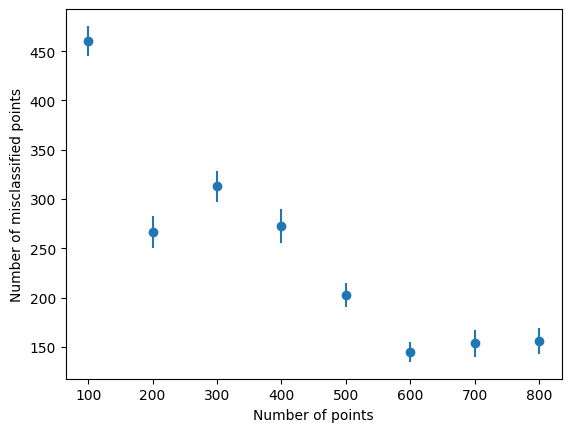

In [333]:
# graph for average
plt.errorbar(
    [x[0] for x in results], 
    [round(x[1], 2) for x in results], 
    yerr=[round(x[2], 3) for x in results], 
    linestyle='None',marker='o')
plt.xlabel('Number of points')
plt.ylabel('Number of misclassified points')
plt.show()

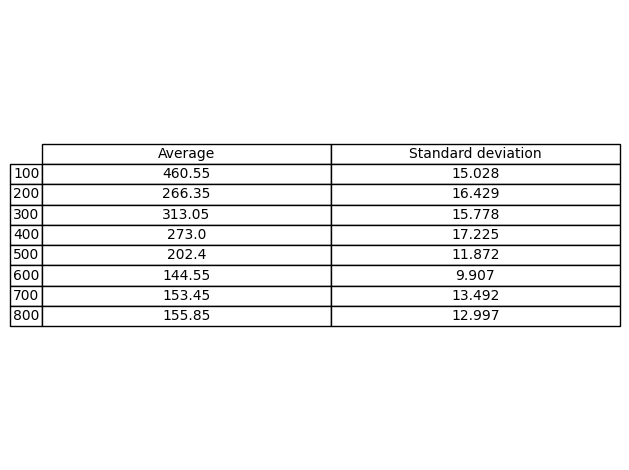

In [334]:
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(
    [(round(x[1], 2), round(x[2], 3)) for x in results],
    rowLabels=[x[0] for x in results],
    colLabels=["Average", "Standard deviation"], loc='center', cellLoc='center')
fig.tight_layout()
plt.show()